In [2]:
import pandas as pd
import codecs
import datetime
import re
from datetime import datetime 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
import itertools
from bokeh.plotting import figure, output_file, show
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error
# This will allow us to avoid a FutureWarning when plotting.
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf
import pickle

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Cal_Fire/time_counts.csv')
df.set_index('date', inplace=True)

,count
date,
2017-07-04,598
2019-07-04,502
2018-07-04,463
2016-07-04,414
2015-07-04,393


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='count'),
                                                    df['count'],
                                                    test_size = 0.05,
                                                   shuffle = False) 

In [5]:
sar = SARIMAX(endog=y_train,
             seasonal_order = (0, 0, 1, 365),
             order = (1,1,2))

In [6]:
s_model = sar.fit()

In [7]:
preds = s_model.predict()

In [8]:
(mean_squared_error(y_train, preds))**.5

12.433762000925869

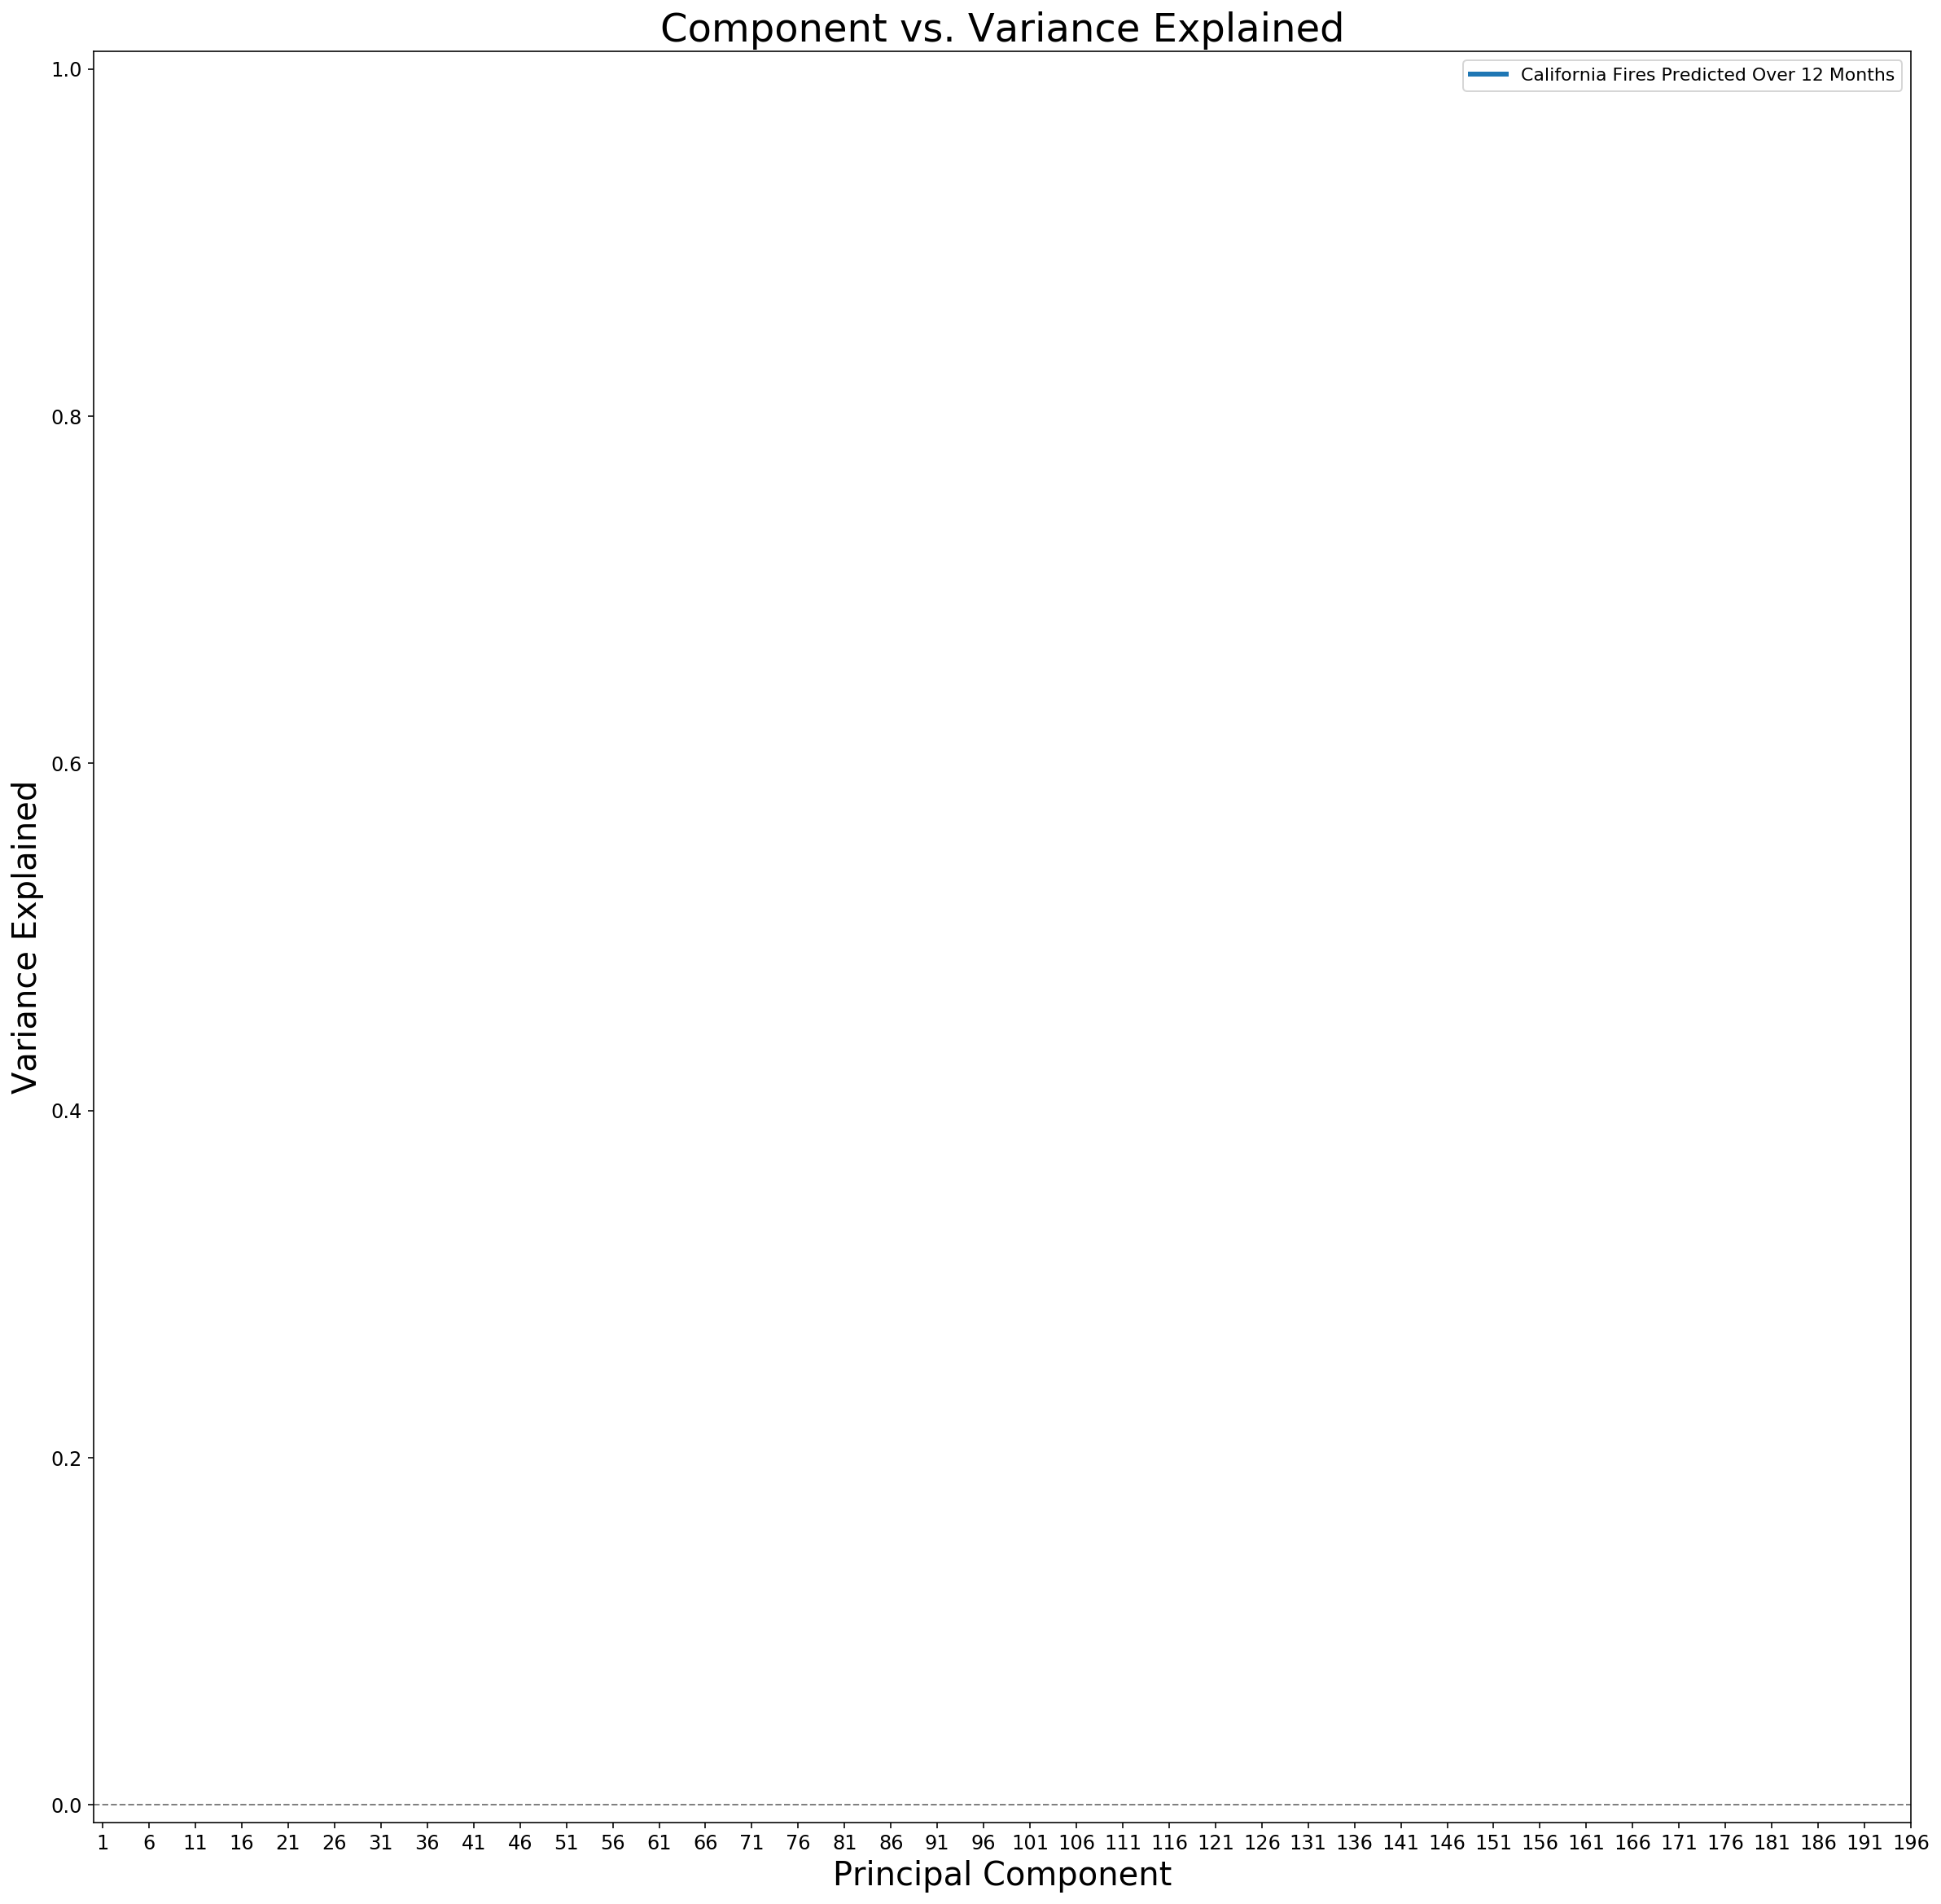

In [9]:
plt.figure(figsize=(20,20))

plt.plot(s_model.forecast(steps=500), lw=3, label = 'California Fires Predicted Over 12 Months')


plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 200, 5), range(1, 200, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [32]:
preds_csv = s_model.forecast(steps=500)
preds_csv.to_json('../Cal_Fire/preds.json')

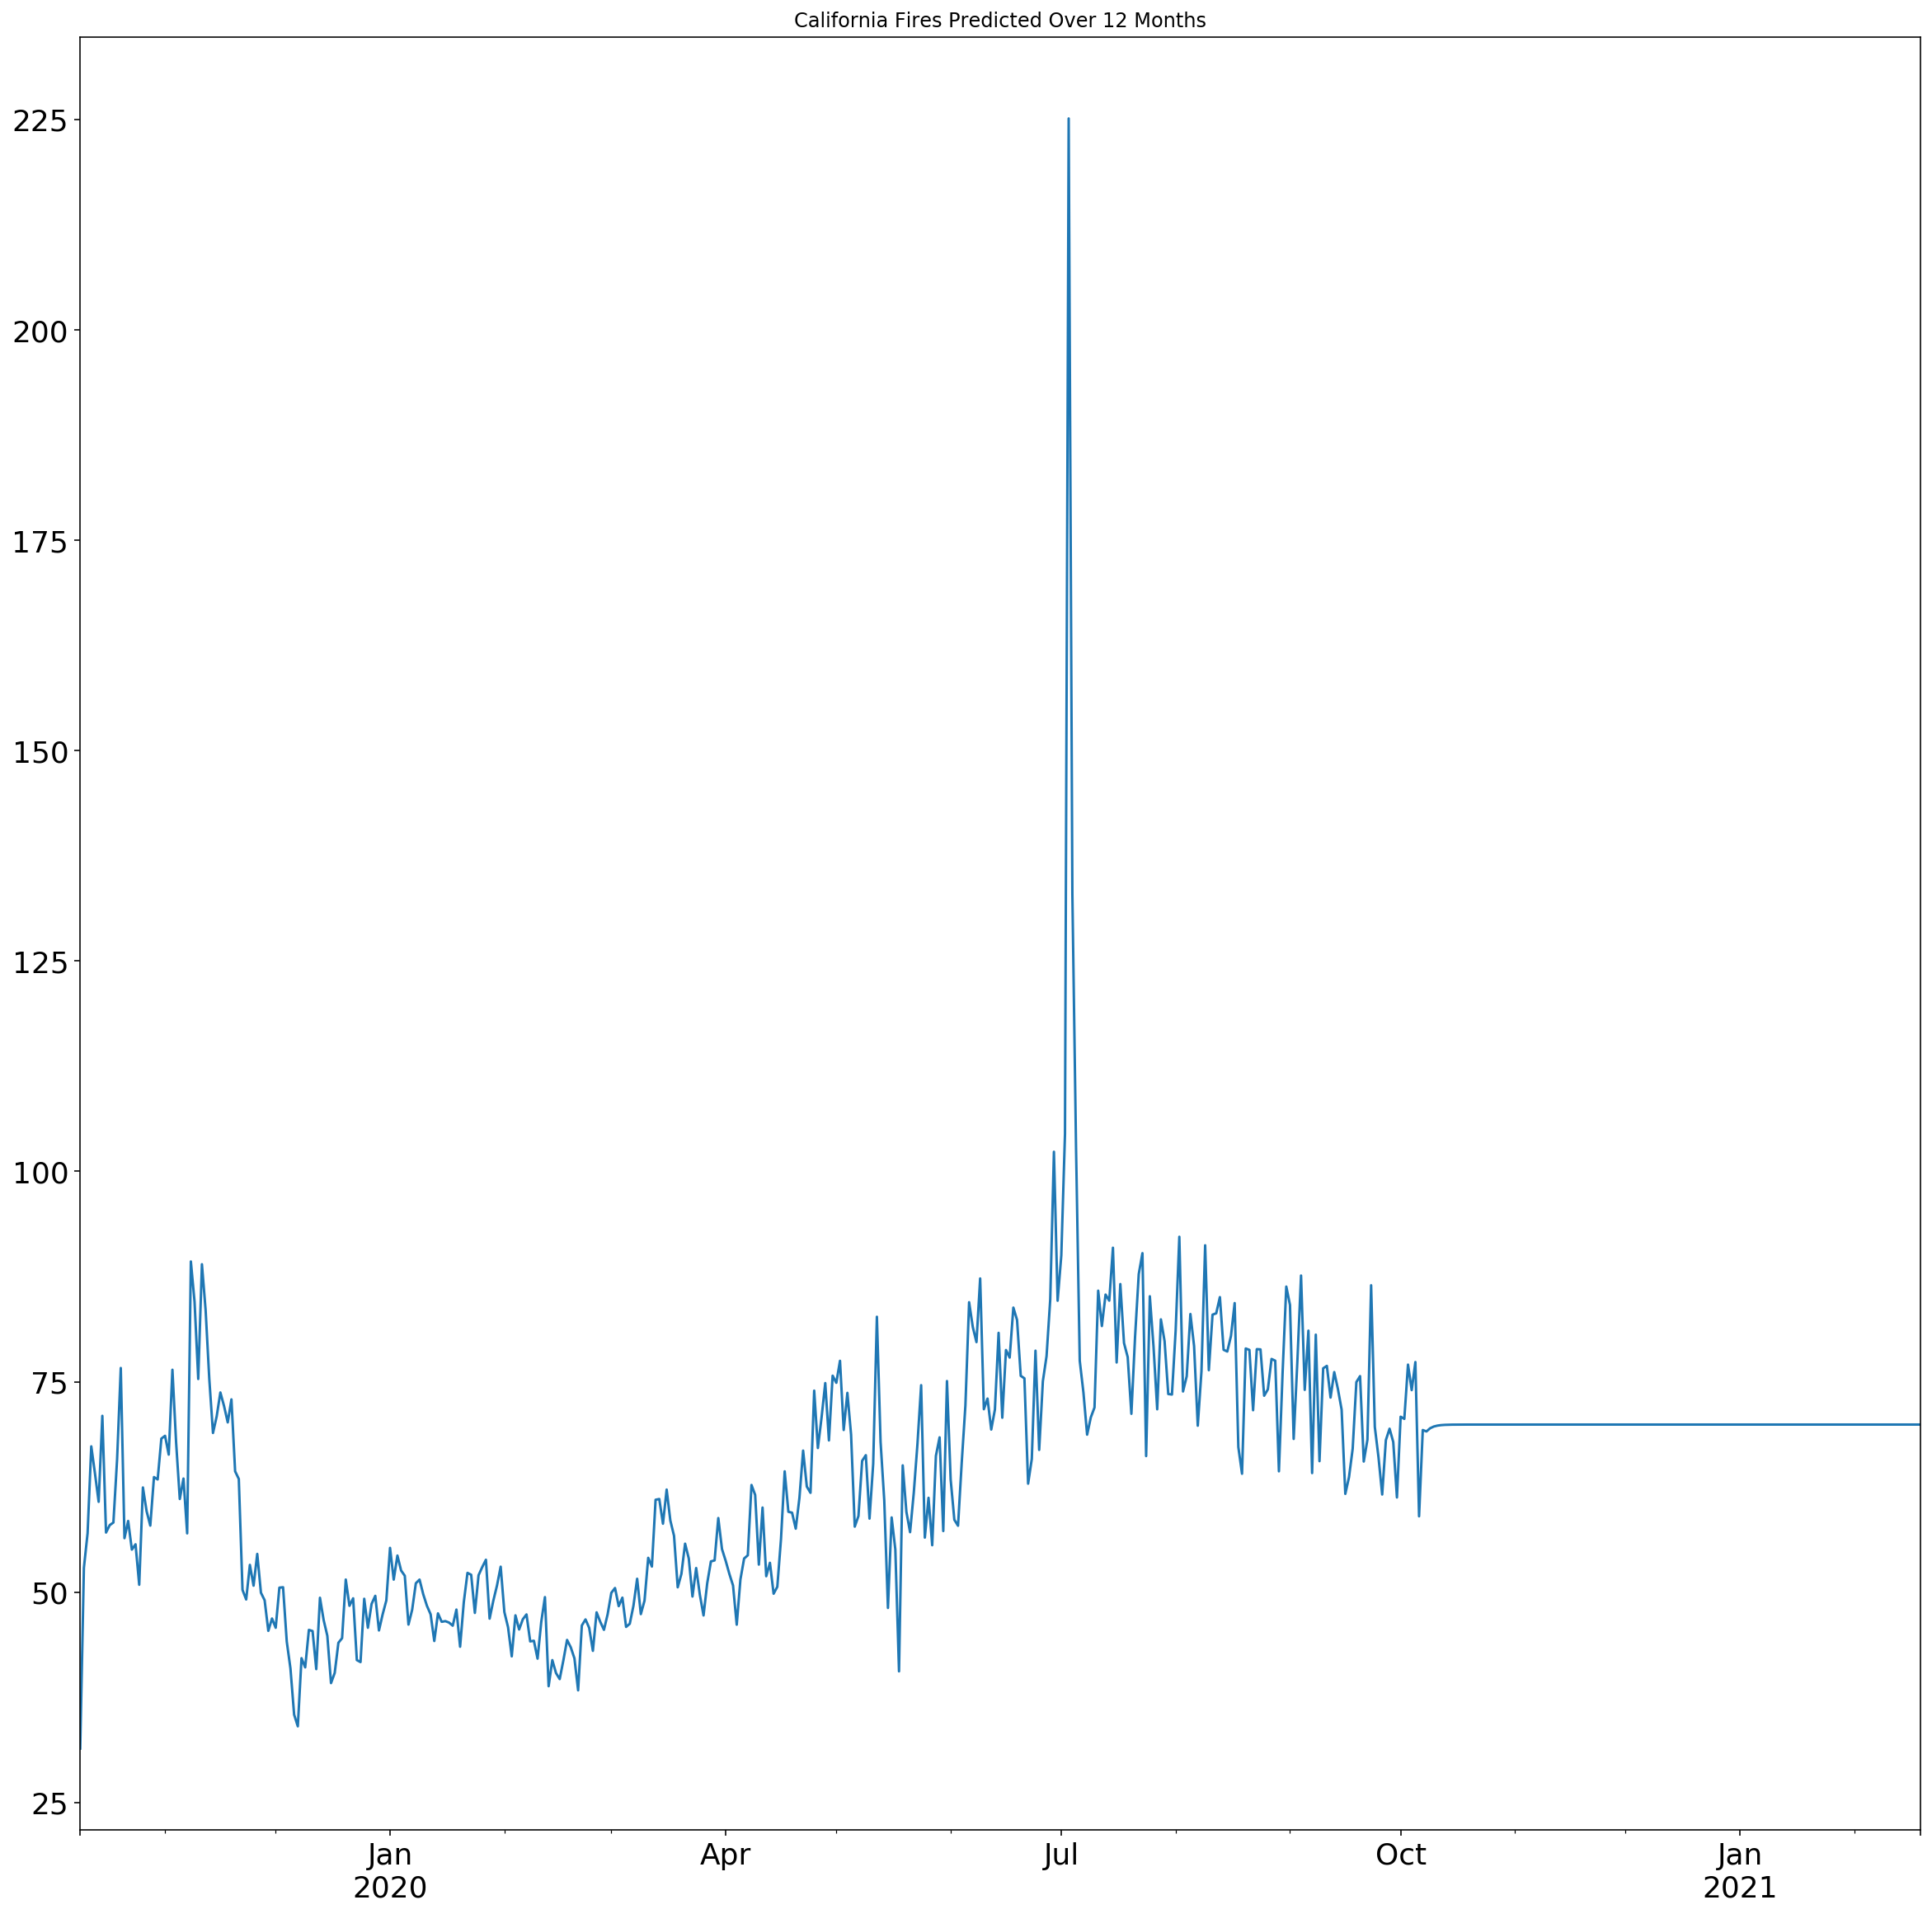

In [31]:
s_model.forecast(steps=500).plot(title ='California Fires Predicted Over 12 Months', fontsize=18 , figsize=(20,20));
plt.savefig('../Cal_Fire/12_mo_preds', dpi=300)